In [1]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [3]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(32, (15, 15), strides=(1, 1), activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 18, 18, 32)        21632     
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 18, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)        

In [4]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 54s 109ms/step - loss: 0.2842 - accuracy: 0.3302 - val_loss: 0.3712 - val_accuracy: 0.2021
Epoch 2/1000
500/500 [==============================] - 52s 105ms/step - loss: 0.2450 - accuracy: 0.4359 - val_loss: 0.2635 - val_accuracy: 0.3726
Epoch 3/1000
500/500 [==============================] - 56s 112ms/step - loss: 0.2301 - accuracy: 0.4712 - val_loss: 0.2408 - val_accuracy: 0.4427
Epoch 4/1000
500/500 [==============================] - 53s 107ms/step - loss: 0.2190 - accuracy: 0.5069 - val_loss: 0.2395 - val_accuracy: 0.4428
Epoch 5/1000
500/500 [==============================] - 62s 125ms/step - loss: 0.2115 - accuracy: 0.5256 - val_loss: 0.2682 - val_accuracy: 0.4273
Epoch 6/1000
500/500 [==============================] - 50s 100ms/step - loss: 0.2051 - accuracy: 0.5404 - val_loss: 0.2214 - val_accuracy: 0.5121
Epoch 7/1000
500/500 [==============================] - 50s 99ms/step - loss: 0.2000 - accuracy: 0.5547 - val_loss: 0.

500/500 [==============================] - 61s 122ms/step - loss: 0.1441 - accuracy: 0.6975 - val_loss: 0.1645 - val_accuracy: 0.6429
Epoch 57/1000
500/500 [==============================] - 61s 123ms/step - loss: 0.1431 - accuracy: 0.6976 - val_loss: 0.1674 - val_accuracy: 0.6441
Epoch 58/1000
500/500 [==============================] - 64s 127ms/step - loss: 0.1435 - accuracy: 0.6972 - val_loss: 0.1738 - val_accuracy: 0.6132
Epoch 59/1000
500/500 [==============================] - ETA: 0s - loss: 0.1428 - accuracy: 0.6995
Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
500/500 [==============================] - 68s 135ms/step - loss: 0.1428 - accuracy: 0.6995 - val_loss: 0.1652 - val_accuracy: 0.6372
Epoch 60/1000
500/500 [==============================] - 67s 134ms/step - loss: 0.1358 - accuracy: 0.7167 - val_loss: 0.1595 - val_accuracy: 0.6565
Epoch 61/1000
500/500 [==============================] - 67s 134ms/step - loss: 0.1351 - accuracy: 0.7166 - v

500/500 [==============================] - 52s 104ms/step - loss: 0.1170 - accuracy: 0.7611 - val_loss: 0.1511 - val_accuracy: 0.6786
Epoch 109/1000
500/500 [==============================] - 57s 114ms/step - loss: 0.1165 - accuracy: 0.7598 - val_loss: 0.1504 - val_accuracy: 0.6808
Epoch 110/1000
500/500 [==============================] - 56s 111ms/step - loss: 0.1178 - accuracy: 0.7571 - val_loss: 0.1538 - val_accuracy: 0.6736
Epoch 111/1000
500/500 [==============================] - 56s 113ms/step - loss: 0.1171 - accuracy: 0.7592 - val_loss: 0.1509 - val_accuracy: 0.6826
Epoch 112/1000
500/500 [==============================] - 61s 122ms/step - loss: 0.1167 - accuracy: 0.7615 - val_loss: 0.1518 - val_accuracy: 0.6859
Epoch 113/1000
500/500 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.7611
Epoch 00113: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
500/500 [==============================] - 58s 116ms/step - loss: 0.1170 - accuracy: 0.7611

Epoch 158/1000
500/500 [==============================] - 63s 126ms/step - loss: 0.1139 - accuracy: 0.7665 - val_loss: 0.1506 - val_accuracy: 0.6810
Epoch 159/1000
500/500 [==============================] - 65s 129ms/step - loss: 0.1136 - accuracy: 0.7674 - val_loss: 0.1505 - val_accuracy: 0.6808
Epoch 160/1000
500/500 [==============================] - 63s 126ms/step - loss: 0.1144 - accuracy: 0.7675 - val_loss: 0.1507 - val_accuracy: 0.6818
Epoch 161/1000
500/500 [==============================] - 65s 130ms/step - loss: 0.1127 - accuracy: 0.7683 - val_loss: 0.1506 - val_accuracy: 0.6820
Epoch 162/1000
500/500 [==============================] - 63s 126ms/step - loss: 0.1126 - accuracy: 0.7702 - val_loss: 0.1506 - val_accuracy: 0.6805
Epoch 00162: early stopping


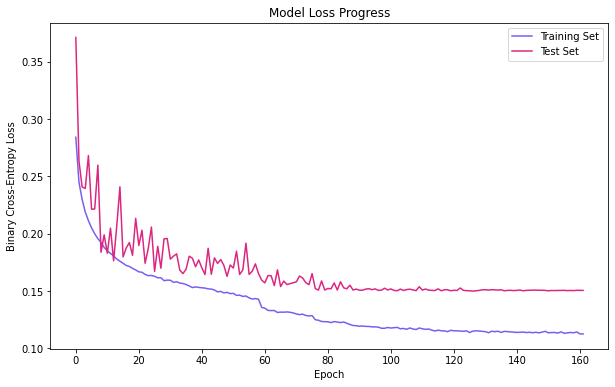

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('cnn 15*15.cifar10.loss1.png', dpi=350, bbox_inches='tight')
plt.show()


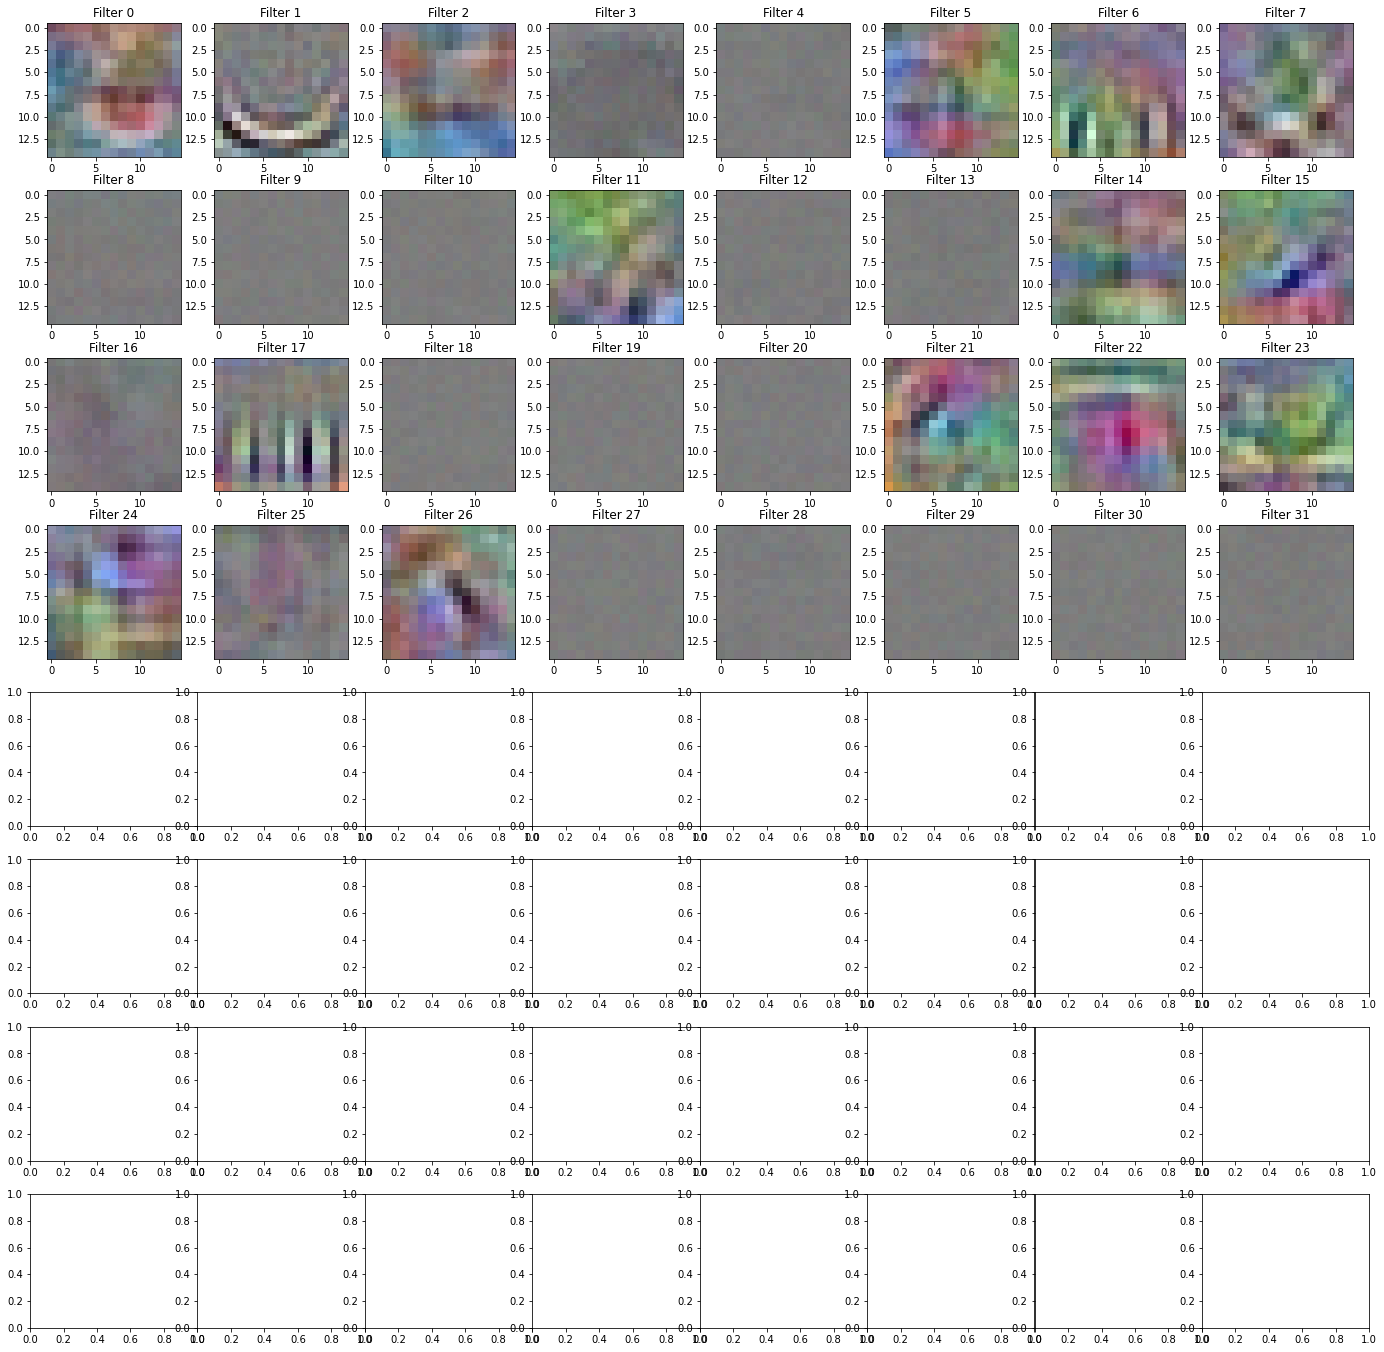

In [6]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (15,15,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("cnn 15*15.full.filters1.png", bbox_inches='tight', dpi=350)


-0.7364154 0.7540064


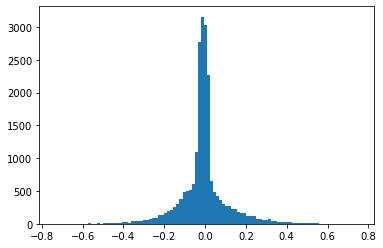

In [7]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))

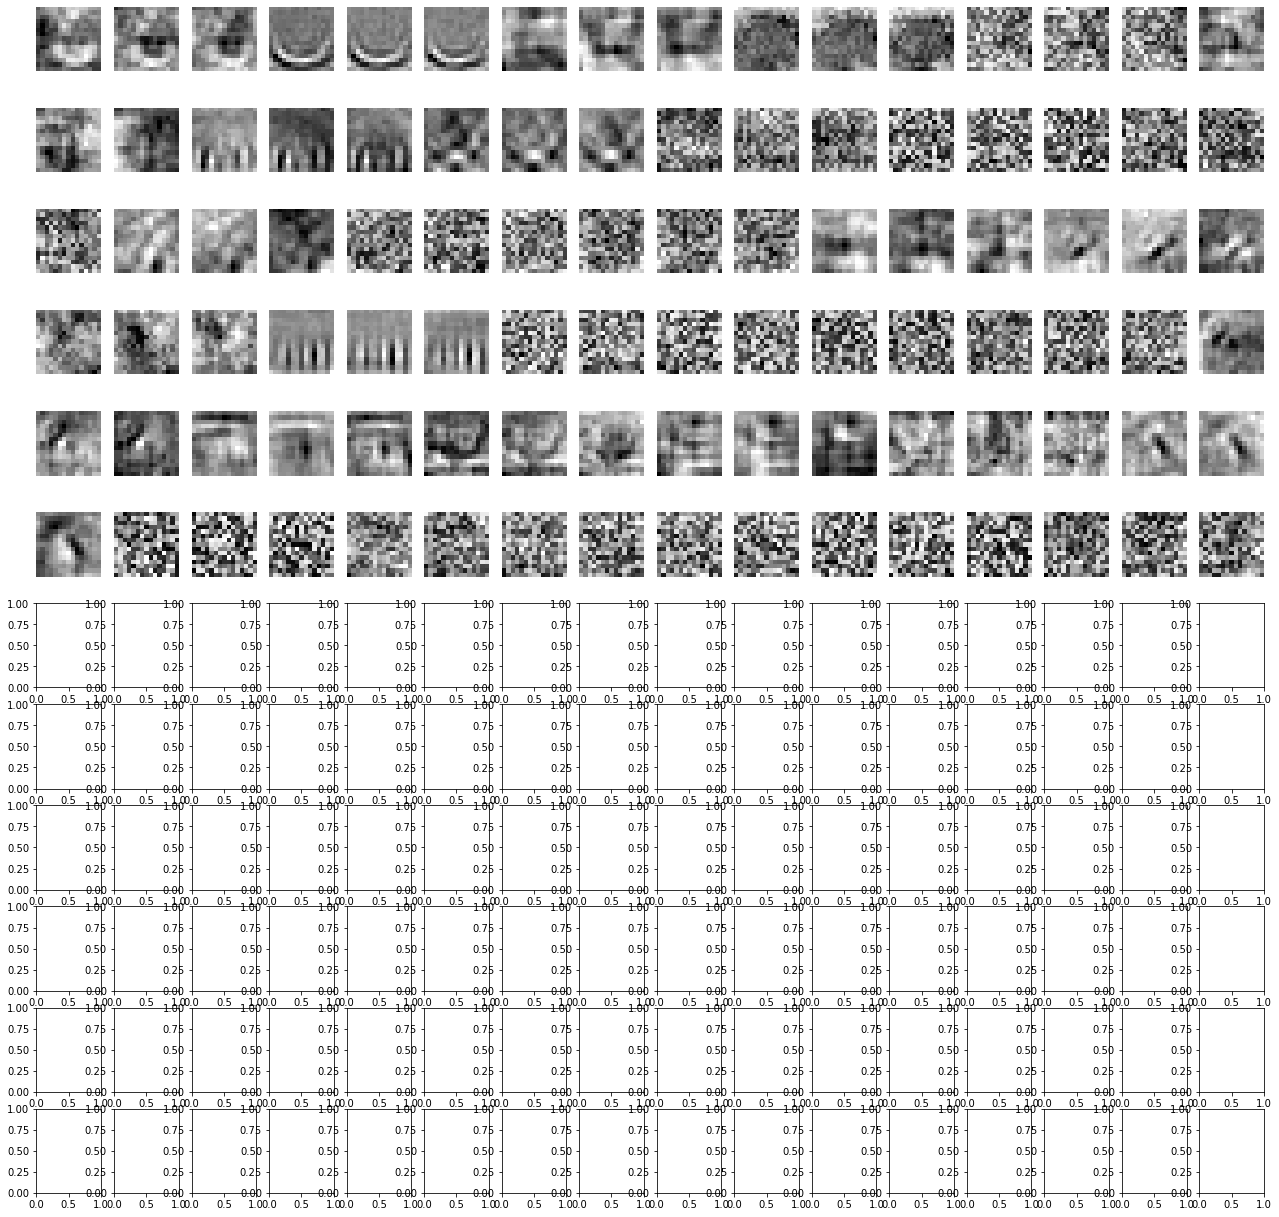

In [9]:
fig = plt.subplots(12, 16, figsize=(22,22))

filter_layers = []
for i in range(32):
    for j in range(3):
        filter_layers.append(np.reshape(W[:,:,j, i], (15,15)))
for i,gf in enumerate(filter_layers):
    plt.subplot(12, 16, i+1)
    plt.imshow(gf, cmap='gray')
    plt.axis('off')